<a href="https://colab.research.google.com/github/EmmanueDavidL/Ciencia_De_Datos2025/blob/main/TITANIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<>:74: SyntaxWarning: invalid escape sequence '\.'
<>:74: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-1425513239.py:74: SyntaxWarning: invalid escape sequence '\.'
  titles=data["Name"].str.extract("([A-Za-z]+)\.",expand=True)


Object `campito` not found.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-n

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,titles
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Señor
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Señora
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Señorita
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Señora
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Señor


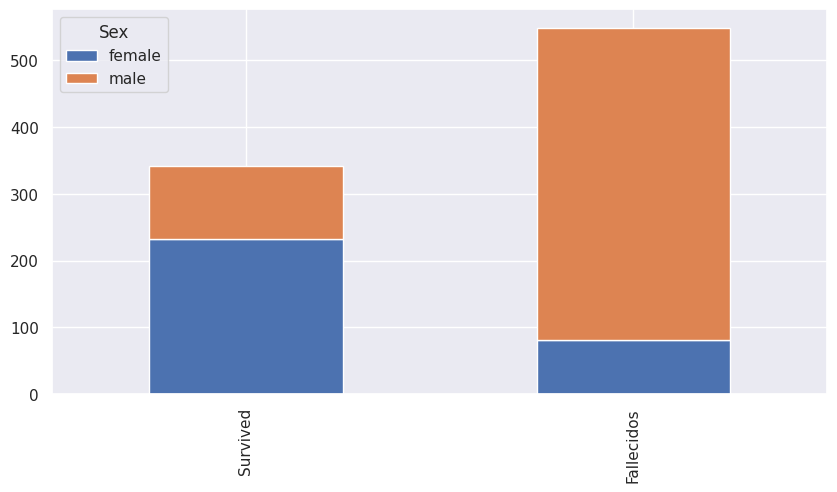

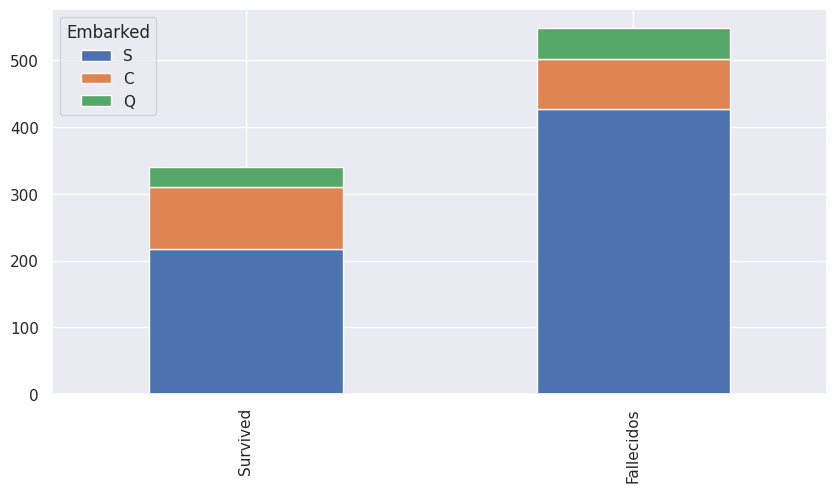

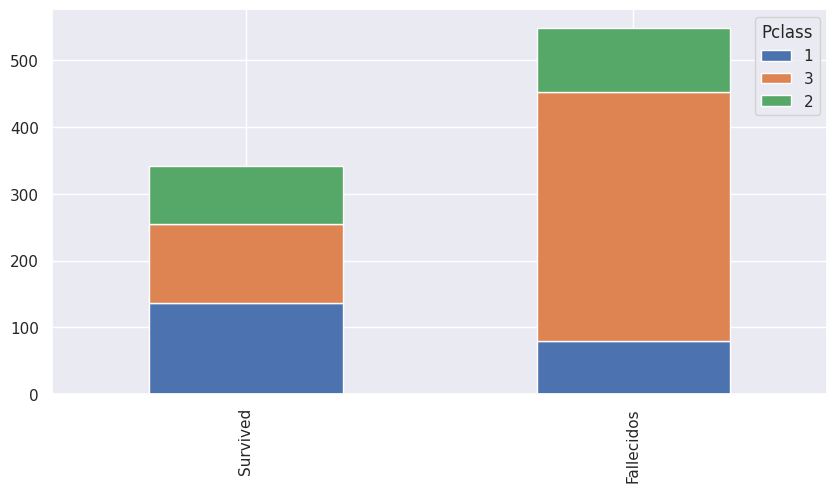

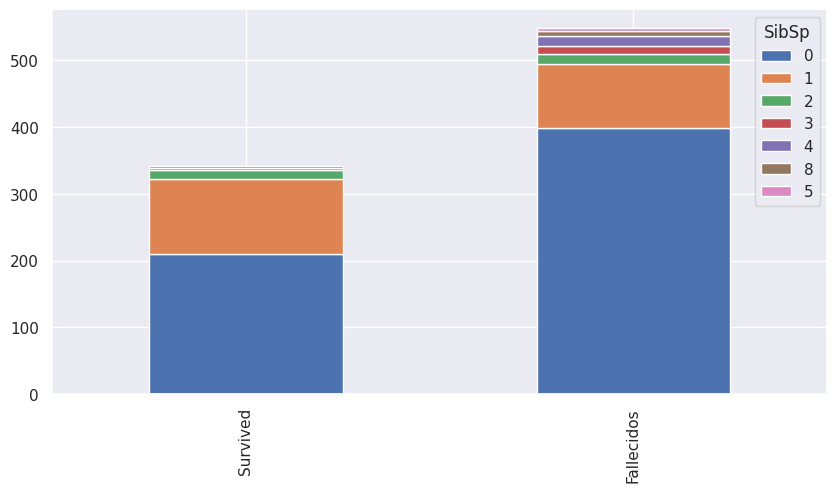

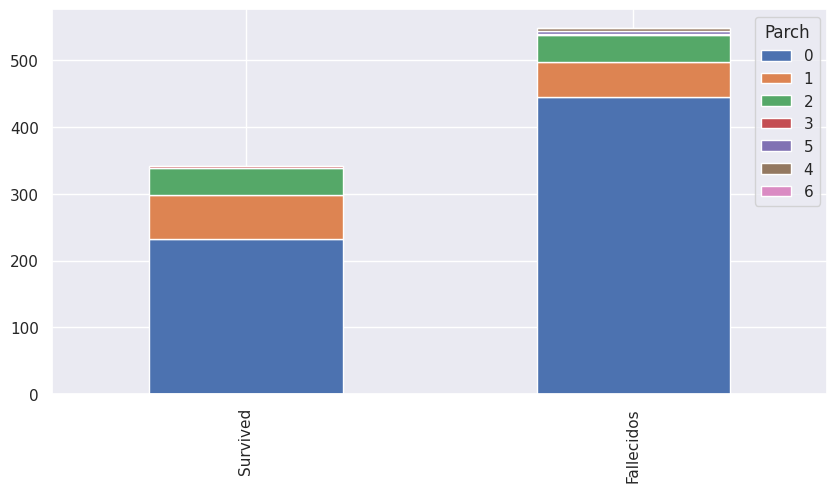

In [ ]:
Pregunta objetivo: Jack se salvaba si Rose le hubiera hecho campito?

##Pasos del EDA
 #**Realizar un análisis descriptivo de las varialbes**
 #**Re-ajustar tipos de variables**
 #**Detectar y tratar datos ausentes** (NaN) que nos permitirá procesar adecuadamente variables numéricas
 #**Identificar datos atípicos y tratarlos de forma adecuada**. Esto mitigará la distorsión de futuros análisis estadísticos
 #**Realizar un exámen

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
df=pd.read_csv("https://raw.githubusercontent.com/nt246/NTRES-6100-data-science/master/datasets/Titanic.csv")
df.head()

###Diccionario de datos



#Survived_ 1=Sobrevive, 0=No sobrevive

#sibsp: Hermanos o esposo abordo

#parch: Padres e hijos abordo

#ticket: Número del tiquete

#embarket: Puerto de embarque, S:Southampton, C:Cherbourg, Q:Queenstown *Sex:male/female

##Análisis descriptivo
#Tomar cada una de las características y analizar

def bar_char(feature):
  survived=df[df['Survived']==1][feature].value_counts()
  dead=df[df["Survived"]==0][feature].value_counts()
  test=pd.DataFrame([survived,dead])
  test.index=['Survived','Fallecidos']
  test.plot(kind="bar",stacked=True,figsize=(10,5))

bar_char("Sex")

#Las **mujeres** mostraron mayor tasa de supervivencia (casi del 60%) en comparación a los **hombre**

df.columns

df.info()

bar_char("Embarked")

#La gráfica señala que los que se montaron en C tienen mayor probabilidad de supervivencia. Los que se montaron en S tienen menos tasa de supervivencia.

bar_char("Pclass")

#Pclass 1 tiene mayor probabilidad de sobrevivir con respecto a Pclass 3.

bar_char("SibSp")

#Las personas solteras presentan menor probabilidad de supervivenciaen comparación con aquellas casadas o en familia

bar_char("Parch")

#La gráfica muestra que la probabilidad de supevivencia aumentaba si tenías entre 1 y 3 hijos, disminuía si eres soltero o con más de 3 hijos.

##Ingeniería de características
#Es el proceso de usar el dominio del conocimiento para crear nuevas características (feature vectors) que logre que los algoritmos de machine learning funcionen adecuadamente.

df.info()

###2. Creando feature vectors

def extract_title(data):
  titles=data["Name"].str.extract("([A-Za-z]+)\.",expand=True)
  return titles

df["titles"]=extract_title(df)
df.head()

def replace_titles(data):
  title_mapping={"Mr":"Señor","Miss":"Señorita", "Mrs":"Señora"}
  data["titles"]=data["titles"].map(title_mapping).fillna("Otros")
  return data

df=replace_titles(df)
df.head()

# Task
Analyze the Titanic dataset to understand passenger demographics, survival rates, and the factors influencing survival, including sex, age, ticket class, and family size. Calculate the average fare per person and analyze the fare distribution by ticket class. Display the results using tables and visualizations where appropriate.

## Load and inspect the data

### Subtask:
Load the Titanic dataset and display the first few rows and the data types of each column.


**Reasoning**:
Load the dataset, display the first few rows, and show the data types to understand the data structure.



In [16]:
df = pd.read_csv("https://raw.githubusercontent.com/nt246/NTRES-6100-data-science/master/datasets/Titanic.csv")
display(df.head())
display(df.info())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

## Analyze passenger count and survival

### Subtask:
Determine the total number of passengers in the dataset, how many survived, and the overall survival rate.


**Reasoning**:
Calculate and print the total number of passengers, survivors, and the survival rate.



In [19]:
total_passengers = len(df)
num_survivors = df['Survived'].sum()
survival_rate = (num_survivors / total_passengers) * 100

print(f"Total number of passengers: {total_passengers}")
print(f"Number of survivors: {num_survivors}")
print(f"Overall survival rate: {survival_rate:.2f}%")

Total number of passengers: 891
Number of survivors: 342
Overall survival rate: 38.38%


## Analyze passenger demographics by sex and ticket class

### Subtask:
Determine the number of male and female passengers and break this down by ticket class.


**Reasoning**:
Group the DataFrame by 'Sex' to count passengers by gender and then group by 'Sex' and 'Pclass' to count passengers by gender and ticket class. Display both results.



In [7]:
passenger_count_by_sex = df['Sex'].value_counts()
passenger_count_by_sex_and_pclass = df.groupby(['Sex', 'Pclass']).size().unstack(fill_value=0)

print("Passenger count by Sex:")
display(passenger_count_by_sex)

print("\nPassenger count by Sex and Pclass:")
display(passenger_count_by_sex_and_pclass)

Passenger count by Sex:


,count
Sex,
male,577
female,314



Passenger count by Sex and Pclass:


Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


## Analyze survival by sex and ticket class

### Subtask:
Calculate survival rates for male and female passengers and analyze survival by ticket class.


**Reasoning**:
Calculate and display the survival rates for sex, ticket class, and the combination of sex and ticket class as requested in the instructions.



In [8]:
survival_rate_by_sex = df.groupby('Sex')['Survived'].mean() * 100
survival_rate_by_pclass = df.groupby('Pclass')['Survived'].mean() * 100
survival_rate_by_sex_and_pclass = df.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack() * 100

print("Survival rate by Sex:")
display(survival_rate_by_sex)

print("\nSurvival rate by Pclass:")
display(survival_rate_by_pclass)

print("\nSurvival rate by Sex and Pclass:")
display(survival_rate_by_sex_and_pclass)

Survival rate by Sex:


,Survived
Sex,
female,74.203822
male,18.890815



Survival rate by Pclass:


,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253



Survival rate by Sex and Pclass:


Pclass,1,2,3
Sex,,,
female,96.808511,92.105263,50.000000
male,36.885246,15.740741,13.544669


## Analyze family size by ticket class

### Subtask:
Determine which ticket class had the most large families and which had the lowest proportion of solo female travelers.

## Analyze family size

### Subtask:
Determine the distribution of family size for each passenger and assess whether most passengers traveled alone or with family.

**Reasoning**:
Create the FamilySize column, calculate its value counts, calculate the percentage of solo travelers, and print both results.

In [20]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
family_size_counts = df['FamilySize'].value_counts().sort_index()
solo_travelers_percentage = (family_size_counts[1] / len(df)) * 100

print("Distribution of Family Size:")
display(family_size_counts)
print(f"\nPercentage of passengers who traveled alone: {solo_travelers_percentage:.2f}%")

Distribution of Family Size:


,count
FamilySize,
1,537
2,161
3,102
4,29
5,15
6,22
7,12
8,6
11,7



Percentage of passengers who traveled alone: 60.27%


## Analyze age distribution

### Subtask:
Determine the number of passengers with and without age information and visualize the age distribution.


**Reasoning**:
Calculate and print the number of missing and non-missing values in the 'Age' column, then visualize the age distribution using a histogram with appropriate labels and title.



Number of passengers with missing age information: 177
Number of passengers with non-missing age information: 714


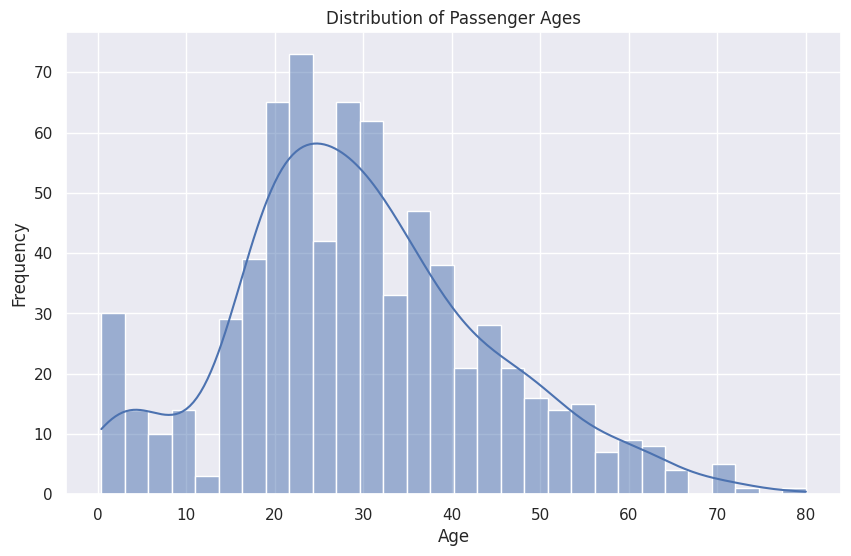

In [9]:
missing_age_count = df['Age'].isnull().sum()
non_missing_age_count = df['Age'].notnull().sum()

print(f"Number of passengers with missing age information: {missing_age_count}")
print(f"Number of passengers with non-missing age information: {non_missing_age_count}")

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title("Distribution of Passenger Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

## Analyze age distribution by ticket class and sex

### Subtask:
Visualize the age distribution broken down by ticket class and sex.


**Reasoning**:
Visualize the age distribution broken down by ticket class and sex using a FacetGrid with histograms.



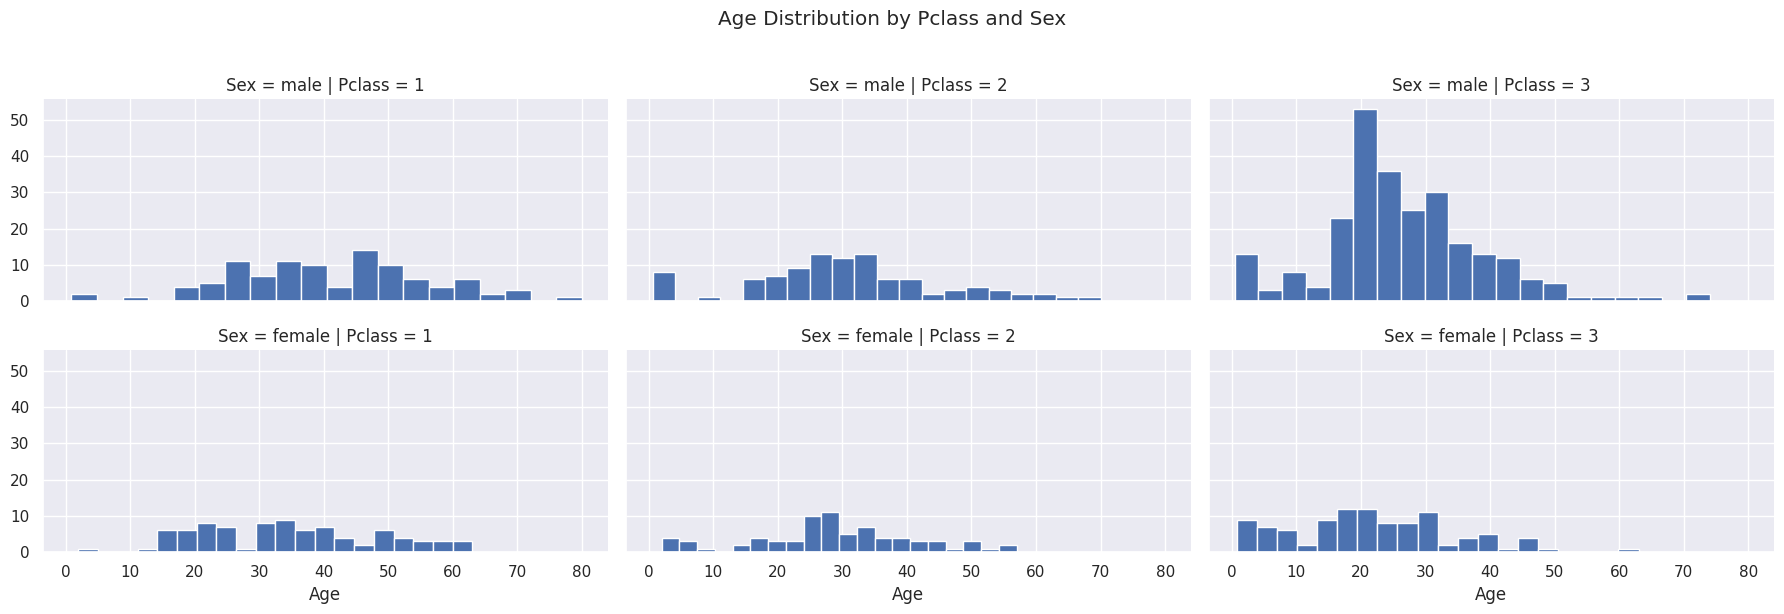

In [10]:
g = sns.FacetGrid(df, row='Sex', col='Pclass', height=3, aspect=2)
g.map(plt.hist, 'Age', bins=20)
g.fig.suptitle('Age Distribution by Pclass and Sex', y=1.02)
g.fig.tight_layout()
plt.show()

## Analyze the impact of sex, ticket class, and age on survival

### Subtask:
Create a single visualization to show how sex, ticket class, and age affect survival chances.


**Reasoning**:
Create a FacetGrid to visualize the relationship between Embarked, Survived, and Pclass with a bar plot.



/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated

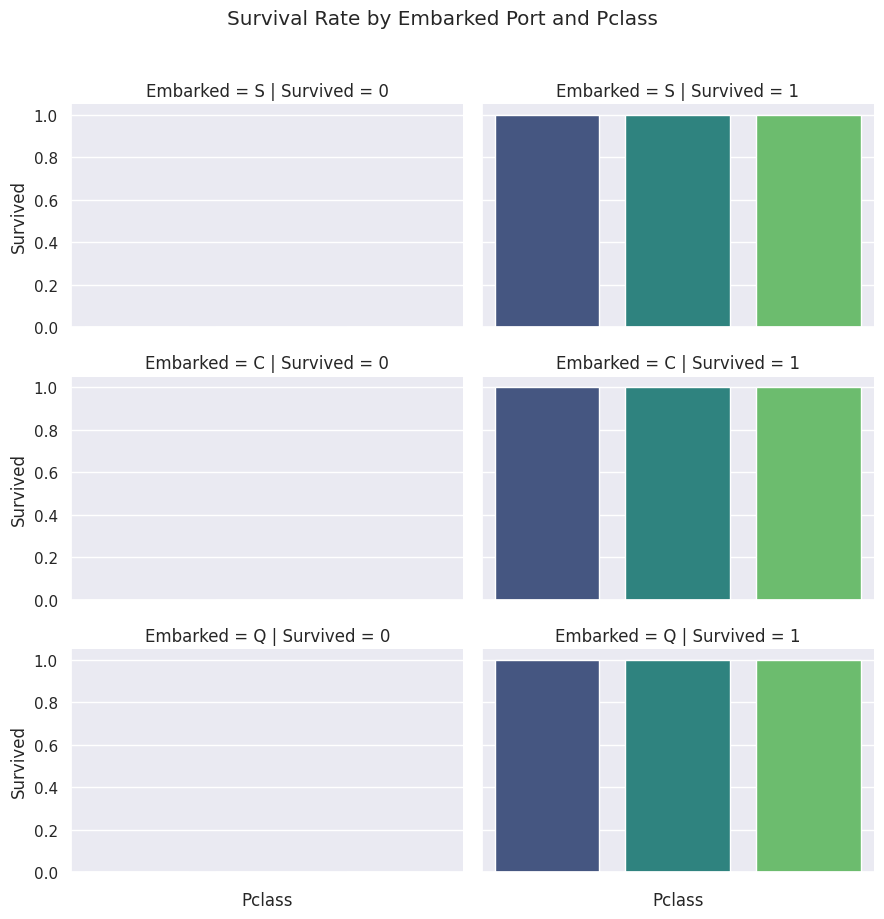

In [11]:
g = sns.FacetGrid(df, row='Embarked', col='Survived', height=3, aspect=1.5)
g.map(sns.barplot, 'Pclass', 'Survived', ci=None, palette='viridis')
g.set_xticklabels(rotation=90)
g.fig.suptitle('Survival Rate by Embarked Port and Pclass', y=1.02)
g.fig.tight_layout()
plt.show()

**Reasoning**:
The task is to create a single visualization showing how sex, ticket class, and age affect survival. The previous attempt was incorrect as it used 'Embarked' instead of 'Sex' and 'Age' was not included. This code will create a FacetGrid with 'Sex' and 'Pclass' and map a histogram of 'Age' for survivors and non-survivors.



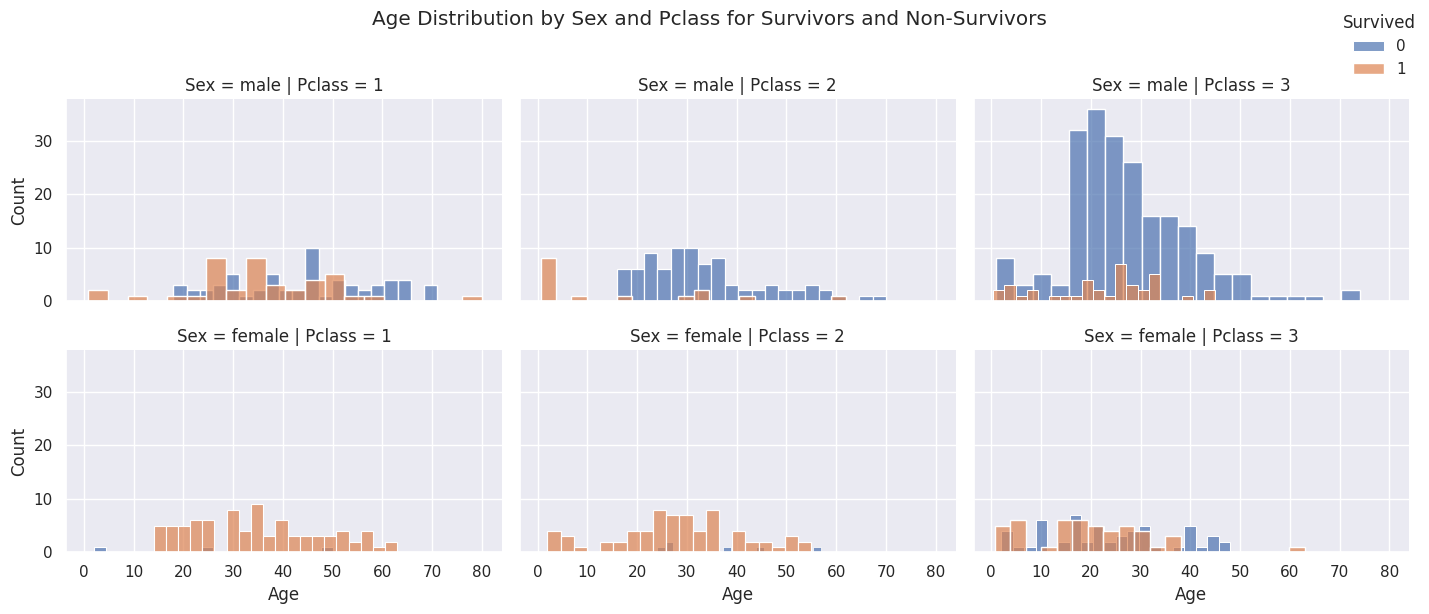

In [12]:
g = sns.FacetGrid(df, row='Sex', col='Pclass', hue='Survived', height=3, aspect=1.5)
g.map(sns.histplot, 'Age', bins=20, alpha=0.7)
g.add_legend(title='Survived', loc='upper right')
g.fig.suptitle('Age Distribution by Sex and Pclass for Survivors and Non-Survivors', y=1.02)
g.fig.tight_layout()
plt.show()

## Analyze family size

### Subtask:
Determine the distribution of family size for each passenger and assess whether most passengers traveled alone or with family.


**Reasoning**:
Create the FamilySize column, calculate its value counts, calculate the percentage of solo travelers, and print both results.



In [13]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
family_size_counts = df['FamilySize'].value_counts().sort_index()
solo_travelers_percentage = (family_size_counts[1] / len(df)) * 100

print("Distribution of Family Size:")
display(family_size_counts)
print(f"\nPercentage of passengers who traveled alone: {solo_travelers_percentage:.2f}%")

Distribution of Family Size:


,count
FamilySize,
1,537
2,161
3,102
4,29
5,15
6,22
7,12
8,6
11,7



Percentage of passengers who traveled alone: 60.27%


## Analyze family size by ticket class

### Subtask:
Determine which ticket class had the most large families and which had the lowest proportion of solo female travelers.


**Reasoning**:
Group the DataFrame by 'Pclass' and 'FamilySize', count passengers, and unstack to create a table showing family size distribution per class. Then identify the class with the most large families.



In [14]:
family_size_by_pclass = df.groupby(['Pclass', 'FamilySize']).size().unstack(fill_value=0)

# Identify the ticket class with the most large families
# Assuming "large" families are those with the maximum FamilySize in the dataset
largest_family_size = family_size_by_pclass.columns[-1]
class_with_most_large_families = family_size_by_pclass[largest_family_size].idxmax()

print("Family size distribution by Pclass:")
display(family_size_by_pclass)
print(f"\nTicket class with the most large families (FamilySize={largest_family_size}): {class_with_most_large_families}")

Family size distribution by Pclass:


FamilySize,1,2,3,4,5,6,7,8,11
Pclass,,,,,,,,,
1,109,70,24,7,2,4,0,0,0
2,104,34,31,13,1,1,0,0,0
3,324,57,47,9,12,17,12,6,7



Ticket class with the most large families (FamilySize=11): 3


**Reasoning**:
Filter the DataFrame to include only female passengers, then group by 'Pclass' and 'FamilySize', count female passengers, and unstack to create a table. Calculate the total number of female passengers per class and the proportion of solo female travelers per class. Finally, identify the class with the lowest proportion of solo female travelers and print the results for both the class with the most large families and the class with the lowest proportion of solo female travelers.



In [15]:
female_df = df[df['Sex'] == 'female']
female_family_size_by_pclass = female_df.groupby(['Pclass', 'FamilySize']).size().unstack(fill_value=0)

total_female_by_pclass = female_df.groupby('Pclass').size()

proportion_solo_female_by_pclass = female_family_size_by_pclass[1] / total_female_by_pclass
class_with_lowest_solo_female_proportion = proportion_solo_female_by_pclass.idxmin()

print("\nFemale passenger family size distribution by Pclass:")
display(female_family_size_by_pclass)

print("\nTotal female passengers by Pclass:")
display(total_female_by_pclass)

print("\nProportion of solo female travelers by Pclass:")
display(proportion_solo_female_by_pclass)

print(f"\nTicket class with the most large families (FamilySize={largest_family_size}): {class_with_most_large_families}")
print(f"Ticket class with the lowest proportion of solo female travelers: {class_with_lowest_solo_female_proportion}")


Female passenger family size distribution by Pclass:


FamilySize,1,2,3,4,5,6,7,8,11
Pclass,,,,,,,,,
1,34,39,13,4,2,2,0,0,0
2,32,19,14,9,1,1,0,0,0
3,60,29,22,6,9,5,8,2,3



Total female passengers by Pclass:


,0
Pclass,
1,94
2,76
3,144



Proportion of solo female travelers by Pclass:


,0
Pclass,
1,0.361702
2,0.421053
3,0.416667



Ticket class with the most large families (FamilySize=11): 3
Ticket class with the lowest proportion of solo female travelers: 1


## Calculate average fare per person

### Subtask:
Calculate the average fare per person, considering that the fare is for a ticket, not an individual passenger.


**Reasoning**:
Calculate the total fare, total number of passengers, and the average fare per person, then print the result.



In [17]:
total_fare = df['Fare'].sum()
total_passengers = len(df)
average_fare_per_person = total_fare / total_passengers

print(f"Total fare: {total_fare:.2f}")
print(f"Total number of passengers: {total_passengers}")
print(f"Average fare per person: {average_fare_per_person:.2f}")

Total fare: 28693.95
Total number of passengers: 891
Average fare per person: 32.20


## Analyze fare distribution by ticket class

### Subtask:
Visualize the distribution of fare by ticket class.


**Reasoning**:
Create a box plot to visualize the distribution of fare by ticket class with appropriate labels and title.



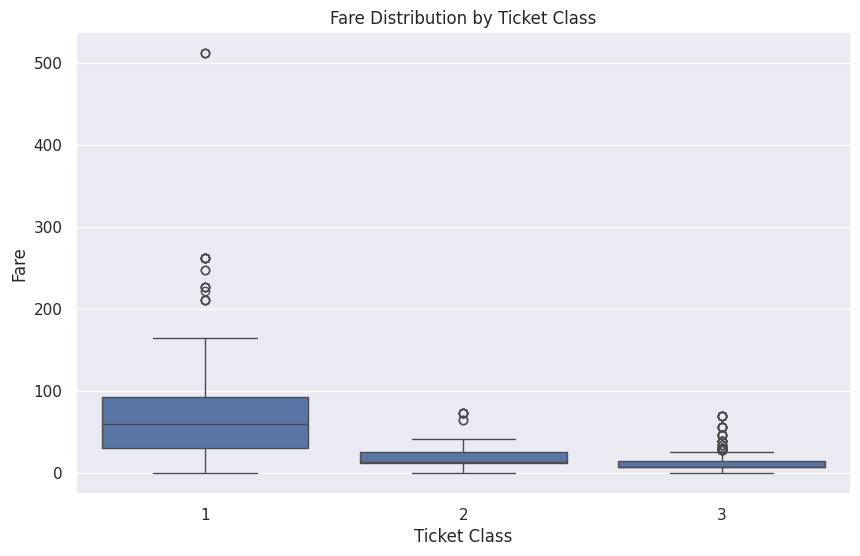

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Fare Distribution by Ticket Class")
plt.xlabel("Ticket Class")
plt.ylabel("Fare")
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset contains 891 passengers, with 342 survivors, resulting in an overall survival rate of approximately 38.38%.
*   There were significantly more male passengers (577) than female passengers (314).
*   Survival rates were significantly higher for females (74.2%) compared to males (18.9%).
*   Survival rates decreased with lower ticket classes: Class 1 (63.0%), Class 2 (47.3%), and Class 3 (24.2%).
*   Females across all ticket classes had much higher survival rates than males, with particularly high survival in Class 1 (96.8%) and Class 2 (92.1%).
*   There are 177 passengers with missing age information.
*   The majority of passengers had a family size of 1, with 537 passengers (60.27%) traveling alone.
*   Pclass 3 had the most large families (FamilySize=11).
*   Pclass 1 had the lowest proportion of solo female travelers.
*   The average fare per person was \$32.20.
*   The distribution of fare varies significantly by ticket class, with higher classes generally having higher fares, as visualized in the box plot.

### Insights or Next Steps

*   Investigate the reasons behind the significantly lower survival rate for males and passengers in lower ticket classes.
*   Explore how family size and the proportion of solo travelers within each class might have influenced survival rates.
